<h1>PAIRS TRADING BACKTEST</h1>

<h3>1. Run Once </h3>
install necessary packages.
After that, you need comment the above part of code

In [1]:
# import sys
# !{sys.executable} -m pip install -r ./requirements.txt

<h3>2. Imports </h3>
get classes of this system

In [2]:
from research import Researcher
from backtest import Backtester

<h3>3. Settings </h3>
Adjust the settings before run.

In [3]:
is_new_historical_data = True
is_new_backtesting = True
exchange = 'binance'
timeframe = '1d'
interval = '1 years ago'
min_correlation = 0.51

<h3>4. Research Data </h3>
Load previous data or get new data by selecting the desired timeframe, interval and minimum correlation for new data

In [4]:
research = Researcher()

if is_new_historical_data:
    # Get new research data #
    research.new_research(exchange=exchange, timeframe=timeframe, interval=interval, min_correlation=min_correlation)
    research.save_outputs()

else:
    # Load last researched data #
    research.load_research()

research.output_df

,currency1,currency2,correlation,ratio,zero_crossings
1870,ATOM/USDT,IOTX/USDT,0.717472,454.911030,61
5757,ENJ/USDT,ZIL/USDT,0.823361,14.438867,59
6637,GAL/USDT,RVN/USDT,0.665046,66.467782,54
6198,FIL/USDT,KLAY/USDT,0.607108,24.936434,54
8994,OGN/USDT,ZEN/USDT,0.712607,0.010939,53
...,...,...,...,...,...
4840,DAR/USDT,RVN/USDT,0.620344,6.211359,31
1976,AUDIO/USDT,DUSK/USDT,0.668721,1.603353,31
4516,CTSI/USDT,ICX/USDT,0.561233,0.653164,31
7935,KLAY/USDT,ROSE/USDT,0.552661,3.614131,31


<h3>5. Backtest Data </h3>
Load previous backtest or get new backtesting by given research data to it

In [5]:
backtest = Backtester(research)

if is_new_backtesting:
    # # Do a new backtesting with researched data #
    backtest.edit_settings(open_at=2, close_at=0)
    backtest.run_backtests()
    backtest.save_outputs()

else:
    backtest.load_backtests()

backtest.results_df

,n_trades,sharperatio,max_drawdown,roi,currency1,currency2,ratio,correlation
0,26,4.562319,8.87,101.77,ATOM/USDT,IOTX/USDT,454.911030,0.717472
0,26,4.562319,8.87,101.77,ATOM/USDT,IOTX/USDT,454.911030,0.717472
0,30,3.504965,11.69,86.19,ENJ/USDT,ZIL/USDT,14.438867,0.823361
0,25,1.293259,32.03,47.61,GAL/USDT,RVN/USDT,66.467782,0.665046
0,27,2.862723,31.72,132.35,FIL/USDT,KLAY/USDT,24.936434,0.607108
...,...,...,...,...,...,...,...,...
0,25,3.829567,10.43,98.32,DAR/USDT,RVN/USDT,6.211359,0.620344
0,23,1.160528,30.99,61.72,AUDIO/USDT,DUSK/USDT,1.603353,0.668721
0,27,4.435441,18.82,150.18,CTSI/USDT,ICX/USDT,0.653164,0.561233
0,28,2.407467,41.06,145.87,KLAY/USDT,ROSE/USDT,3.614131,0.552661


<h3>6. Selecting Pairs </h3>
It removes pairs with low sharpe ratio and high draw down, and also removes same currency appearing.

In [11]:
# Removes unwanted pairs
df = backtest.results_df
df_filtered = df[(df['sharperatio'] >= 4) & (df['max_drawdown'] <= 20)]
# df_filtered = df[(df['max_drawdown'] <= 30) & (df['roi'] >= 300) & (df['sharperatio'] >= 3)]
df_unique =  df_filtered.drop_duplicates(subset='currency1', keep='first', inplace=False).drop_duplicates(subset='currency2', keep='first', inplace=False)

# In case of same currency apparition, it removes the weaker pair #
weaker_pairs = df_unique.apply(lambda x: df_unique.loc[df_unique['currency2'] == x['currency1'], 'roi'].max() >= x['roi'] or
                                         df_unique.loc[df_unique['currency1'] == x['currency2'], 'roi'].max() >= x['roi'], axis=1)
df_final = df_unique[~weaker_pairs]
df_final

,n_trades,sharperatio,max_drawdown,roi,currency1,currency2,ratio,correlation
0,26,4.562319,8.87,101.77,ATOM/USDT,IOTX/USDT,454.911030,0.717472
0,27,4.253831,16.27,159.00,QTUM/USDT,SNX/USDT,1.133329,0.636181
0,36,6.754805,5.95,172.24,FLM/USDT,HOT/USDT,51.760393,0.716912
0,31,6.105638,9.58,210.91,API3/USDT,GTC/USDT,0.867866,0.673052
0,28,4.376452,6.74,116.21,AVAX/USDT,CRV/USDT,18.422793,0.745994
0,28,5.499978,5.36,116.12,FIL/USDT,VET/USDT,233.839167,0.771241
0,26,5.358153,8.63,207.88,NMR/USDT,SKL/USDT,432.380491,0.520367
0,24,4.605557,6.55,100.80,KSM/USDT,RVN/USDT,1196.908798,0.632452
0,25,4.520205,11.17,134.66,TRB/USDT,UNI/USDT,2.390283,0.620580
0,27,4.435441,18.82,150.18,CTSI/USDT,ICX/USDT,0.653164,0.561233


<h3>7. Exporting Results to BOT </h3>

In [12]:
df_exports = df_final[['currency1', 'currency2', 'ratio']].copy()
df_exports['timeframe'] = timeframe
df_exports.reset_index(inplace=True, drop=True)
df_exports.to_csv('./data/outputs/bot_input.csv', index=False)
df_exports

,currency1,currency2,ratio,timeframe
0,ATOM/USDT,IOTX/USDT,454.911030,1d
1,QTUM/USDT,SNX/USDT,1.133329,1d
2,FLM/USDT,HOT/USDT,51.760393,1d
3,API3/USDT,GTC/USDT,0.867866,1d
4,AVAX/USDT,CRV/USDT,18.422793,1d
5,FIL/USDT,VET/USDT,233.839167,1d
6,NMR/USDT,SKL/USDT,432.380491,1d
7,KSM/USDT,RVN/USDT,1196.908798,1d
8,TRB/USDT,UNI/USDT,2.390283,1d
9,CTSI/USDT,ICX/USDT,0.653164,1d


<h3>8. Visualizing Results </h3>
Of the remaining pairs on list

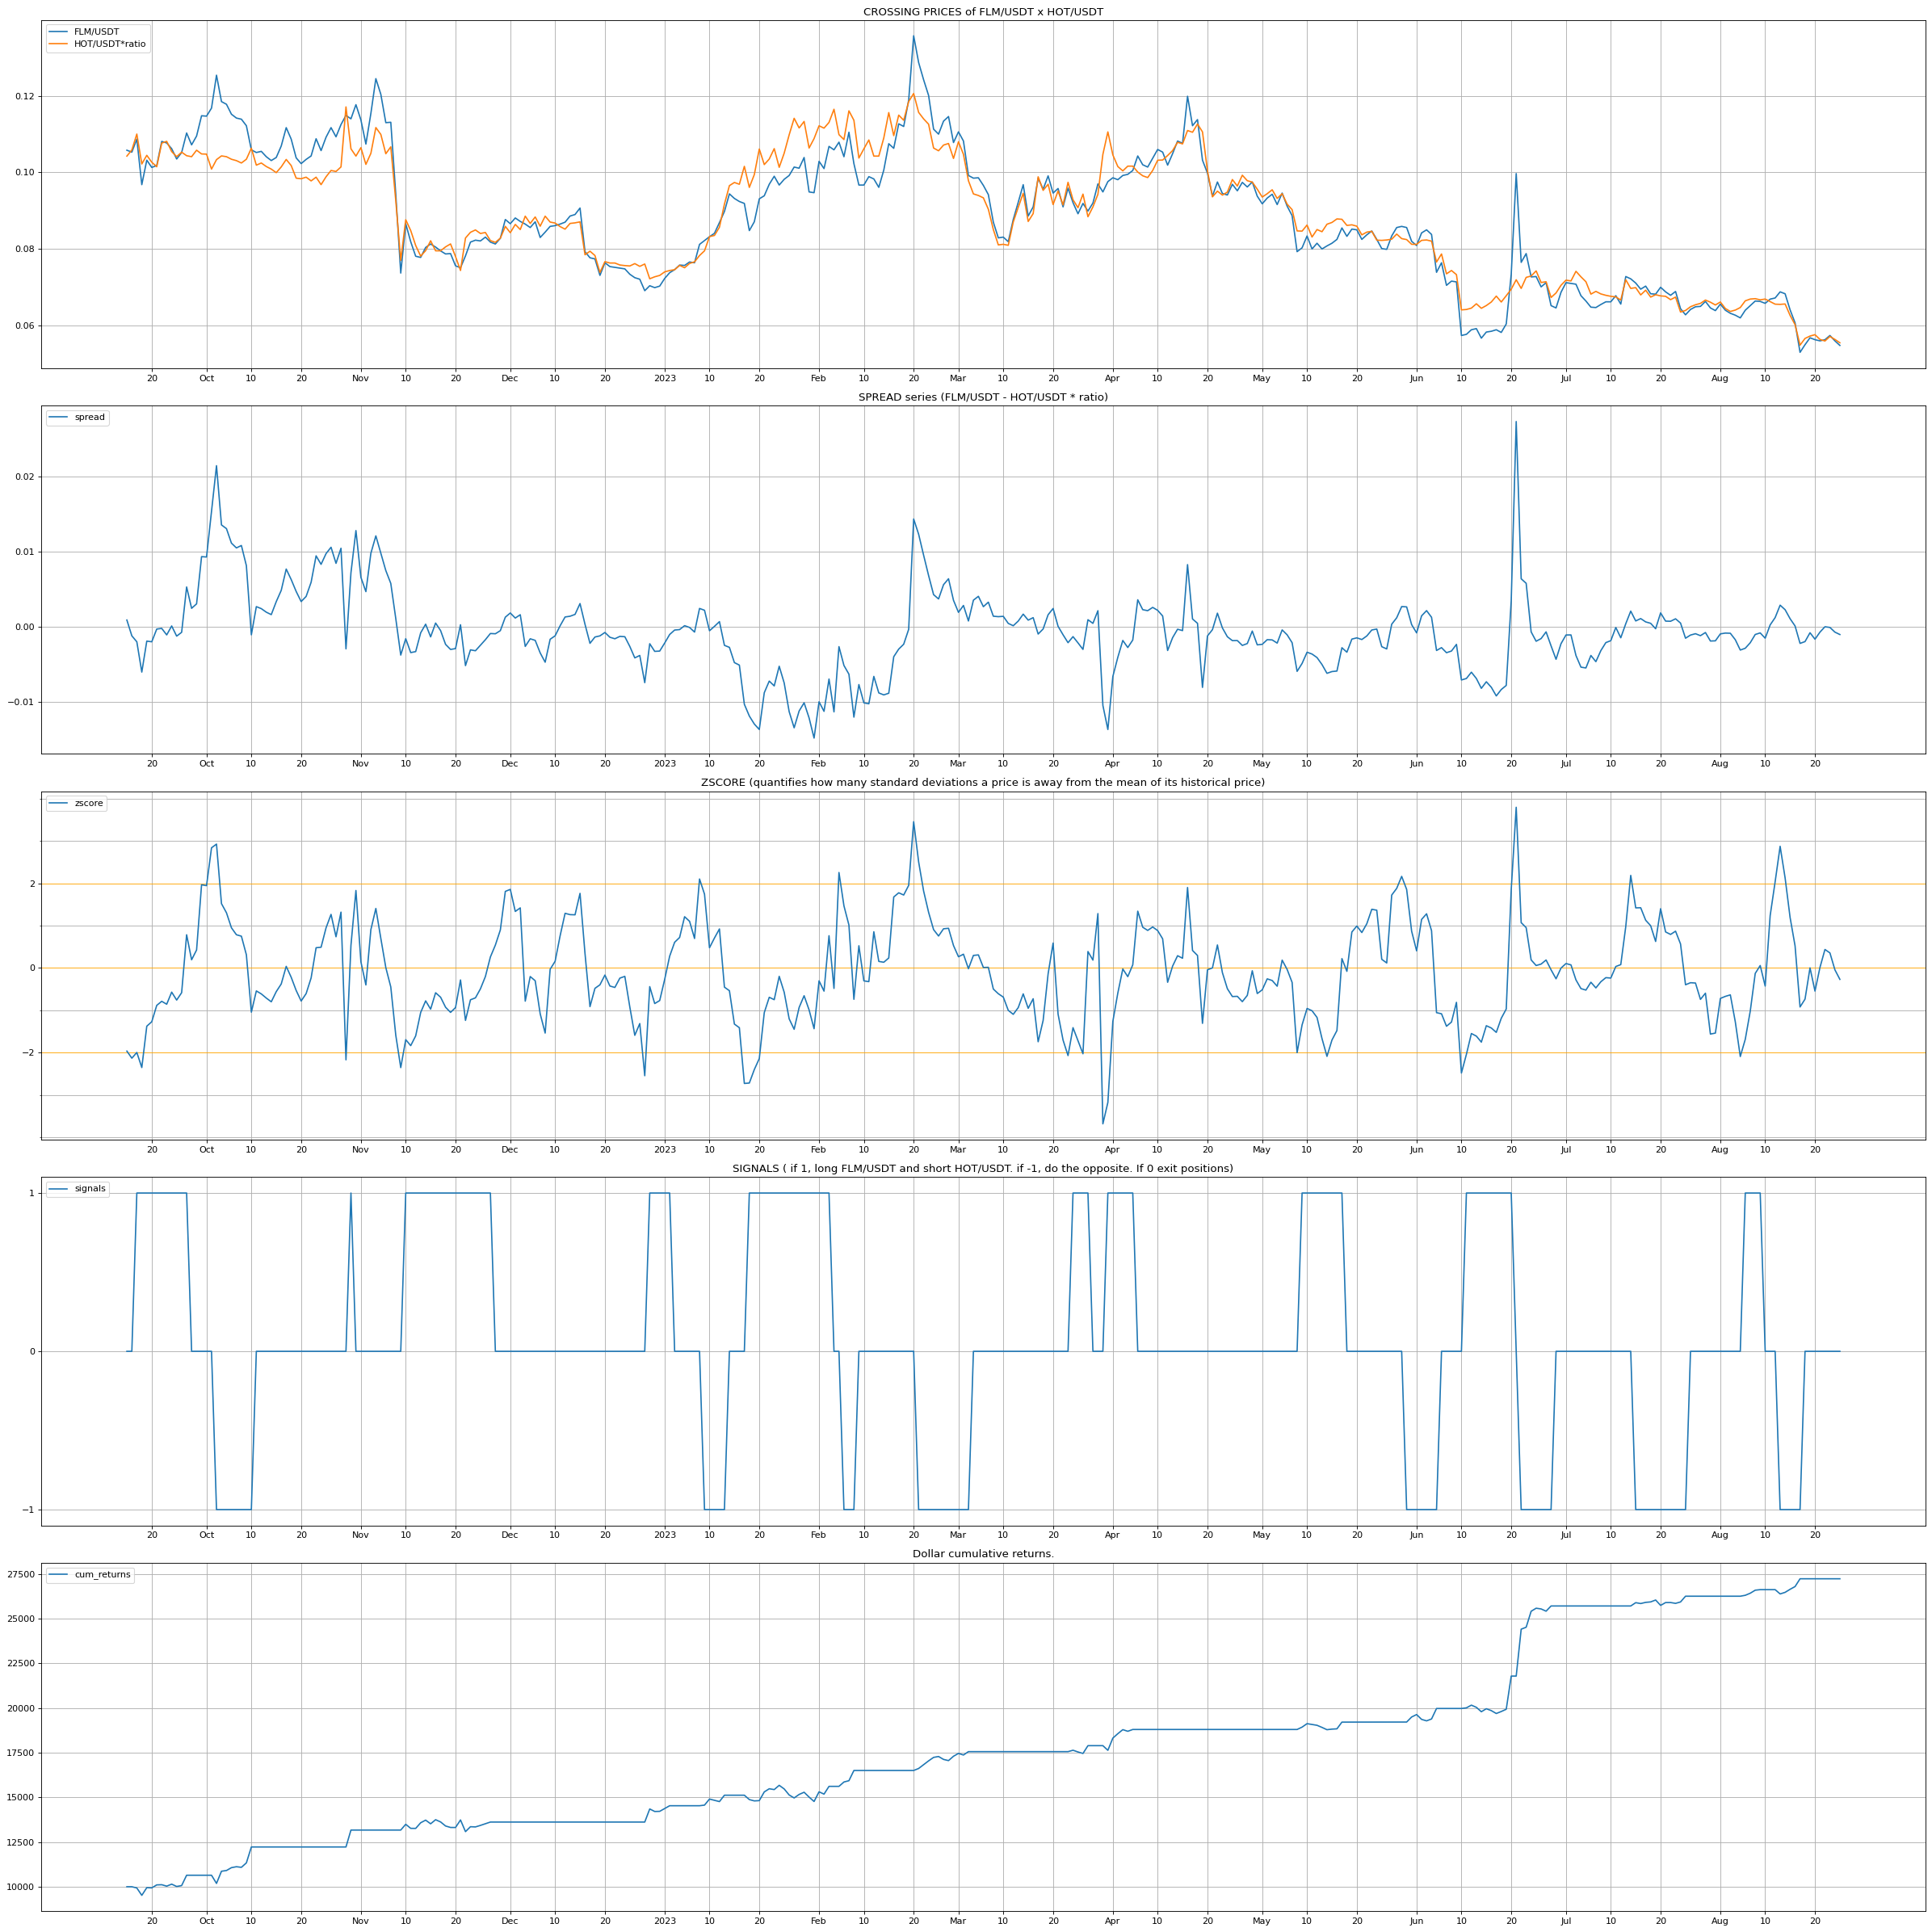

,FLM/USDT,HOT/USDT,spread,zscore,signals,log_returns1,log_returns2,log_returns_total,simple_returns,dollar_returns,cum_returns
time,,,,,,,,,,,
2022-09-15,0.1058,0.002027,0.000882,-1.964451,0.0,-0.000000,0.000000,0.000000,0.000000,0.000000,10000.000000
2022-09-16,0.1053,0.002058,-0.001223,-2.132144,0.0,-0.000000,-0.000000,-0.000000,0.000000,0.000000,10000.000000
2022-09-17,0.1087,0.002139,-0.002015,-1.996640,1.0,0.031778,-0.038604,-0.006825,-0.006802,-68.021774,9931.978226
2022-09-18,0.0968,0.001987,-0.006048,-2.353162,1.0,-0.115945,0.073712,-0.042232,-0.041353,-413.529709,9518.448516
2022-09-19,0.1032,0.002031,-0.001925,-1.376333,1.0,0.064022,-0.021902,0.042120,0.043019,430.191535,9948.640051
...,...,...,...,...,...,...,...,...,...,...,...
2023-08-21,0.0560,0.001096,-0.000729,0.012251,0.0,-0.000000,0.000000,0.000000,0.000000,0.000000,27223.747449
2023-08-22,0.0563,0.001088,-0.000015,0.436866,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,27223.747449
2023-08-23,0.0574,0.001111,-0.000106,0.355645,0.0,0.000000,-0.000000,0.000000,0.000000,0.000000,27223.747449


In [13]:
output_df = backtest.plot('FLM/USDT', 'HOT/USDT')
output_df